In [ ]:
!nvidia-smi

Mon Jul  7 07:03:39 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   43C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  default-jre-headless fonts-dejavu-core fonts-dejavu-extra
  libatk-wrapper-java libatk-wrapper-java-jni libxtst6 libxxf86dga1
  openjdk-11-jre x11-utils
Suggested packages:
  mesa-utils
The following NEW packages will be installed:
  default-jre default-jre-headless fonts-dejavu-core fonts-dejavu-extra
  libatk-wrapper-java libatk-wrapper-java-jni libxtst6 libxxf86dga1
  openjdk-11-jre x11-utils
0 upgraded, 10 newly installed, 0 to remove and 35 not upgraded.
Need to get 3,634 kB of archives.
After this operation, 12.4 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 default-jre-headless amd64 2:1.11-72build2 [3,042 B]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxtst6 amd64 2:1.2.3-1build4 [13.4 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 openjdk-11-

In [ ]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o --progress-bar off


Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html


In [ ]:
!apt-get install -y default-jre


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
default-jre is already the newest version (2:1.11-72build2).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
!java -version


openjdk version "11.0.27" 2025-04-15
OpenJDK Runtime Environment (build 11.0.27+6-post-Ubuntu-0ubuntu122.04)
OpenJDK 64-Bit Server VM (build 11.0.27+6-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)


In [ ]:
import h2o
h2o.init()


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.27" 2025-04-15; OpenJDK Runtime Environment (build 11.0.27+6-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.27+6-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.11/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp413j8i5x
  JVM stdout: /tmp/tmp413j8i5x/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp413j8i5x/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,3 months and 9 days
H2O_cluster_name:,H2O_from_python_unknownUser_v1r1fs
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
from h2o.automl import H2OAutoML

In [ ]:
churn_df=h2o.import_file("https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
churn_df.types

{'customerID': 'string',
 'gender': 'enum',
 'SeniorCitizen': 'int',
 'Partner': 'enum',
 'Dependents': 'enum',
 'tenure': 'int',
 'PhoneService': 'enum',
 'MultipleLines': 'enum',
 'InternetService': 'enum',
 'OnlineSecurity': 'enum',
 'OnlineBackup': 'enum',
 'DeviceProtection': 'enum',
 'TechSupport': 'enum',
 'StreamingTV': 'enum',
 'StreamingMovies': 'enum',
 'Contract': 'enum',
 'PaperlessBilling': 'enum',
 'PaymentMethod': 'enum',
 'MonthlyCharges': 'real',
 'TotalCharges': 'real',
 'Churn': 'enum'}

In [ ]:
churn_df.describe()

Rows:7043
Cols:21

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
type,string,enum,int,enum,enum,int,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,real,real,enum
mins,NaN,,0.0,,,0.0,,,,,,,,,,,,,18.25,18.8,
mean,NaN,,0.1621468124378816,,,32.37114865824223,,,,,,,,,,,,,64.76169246059916,2283.300440841865,
maxs,NaN,,1.0,,,72.0,,,,,,,,,,,,,118.75,8684.8,
sigma,NaN,,0.3686116056100131,,,24.559481023094456,,,,,,,,,,,,,30.090047097678482,2266.771361883145,
zeros,0,,5901,,,11,,,,,,,,,,,,,0,0,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [ ]:
churn_train,churn_test,churn_valid=churn_df.split_frame(ratios=[0.7,0.15])

In [ ]:
y='Churn'
x=churn_df.columns
x.remove(y)
x.remove("customerID")


In [ ]:
aml = H2OAutoML(max_models = 10, seed = 10, verbosity="info", nfolds=0)


In [ ]:
aml.train(x=x,y=y,training_frame=churn_train,validation_frame=churn_valid)

AutoML progress: |
08:19:57.198: Project: AutoML_1_20250707_81957
08:19:57.201: Cross-validation disabled by user: no fold column nor nfolds > 1.
08:19:57.203: Setting stopping tolerance adaptively based on the training frame: 0.014234965584343246
08:19:57.204: Build control seed: 10
08:19:57.204: training frame: Frame key: AutoML_1_20250707_81957_training_py_2_sid_9d72    cols: 21    rows: 4935  chunks: 8    size: 266448  checksum: -3937530885867180857
08:19:57.205: validation frame: Frame key: py_4_sid_9d72    cols: 21    rows: 1014  chunks: 8    size: 137603  checksum: -347915093456024979
08:19:57.205: leaderboard frame: Frame key: py_4_sid_9d72    cols: 21    rows: 1014  chunks: 8    size: 137603  checksum: -347915093456024979
08:19:57.206: blending frame: NULL
08:19:57.206: response column: Churn
08:19:57.206: fold column: null
08:19:57.207: weights column: null
08:19:57.247: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w),

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_1_AutoML_1_20250707_81957


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    45                 45                          19346                  7            14           8.66667       27            32            29.4667

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.11720489814816752
RMSE: 0.3423520091195136
LogLoss: 0.364600252737919
Mean Per-Class Error: 0.19836930956985313
AUC: 0.8906972246903255
AUCPR: 0.743546769826086
Gini: 0.7813944493806511

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.35936799089971494
       No    Yes    Error    Rate
-----  ----  -----  -------  --------------
No     3036  574    0.159    (574.0/3610.0)
Yes    315   1010   0.2377   (315.0/1325.0)
Total  3351  1584   0.1801   (889.0/4935.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.359368     0.694397  202
max f2                       0.187107     0.795366  279
max f0point5                 0.537583     0.695471  130
max accuracy                 0.484336     0.831003  151
max precision                0.907599     1         0
max recall                   0.0229681    1         384
max specificity              0.907599     1         0
max absolute_mcc             0.359368     0.572667  202
max min_per_class_accuracy   0.309983     0.803774  224
max mean_per_class_accuracy  0.227692     0.809196  260
max tns                      0.907599     3610      0
max fns                      0.907599     1323      0
max fps                      0.00870909   3610      399
max tps                      0.0229681    1325      384
max tnr                      0.907599     1         0
max fnr                      0.907599     0.998491  0
max fpr                      0.00870909   1         399
max tpr                      0.0229681    1         384

Gains/Lift Table: Avg response rate: 26.85 %, avg score: 26.91 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0103343                   0.868787           3.43241    3.43241            0.921569         0.882171   0.921569                    0.882171            0.0354717       0.0354717                  243.241   243.241            0.0343637
2        0.0202634                   0.850948           3.34447    3.38932            0.897959         0.858279   0.91                        0.870464            0.0332075       0.0686792                  234.447   238.932            0.0661862
3        0.0301925                   0.832402           3.42049    3.39957            0.918367         0.843293   0.912752                    0.861529            0.0339623       0.102642                   242.049   239.957            0.0990404
4        0.0401216                   0.806744           3.34447    3.38593            0.897959         0.818185   0.909091                    0.850802            0.0332075       0.135849                   234.447   238.593            0.130863
5        0.0500507                   0.780158           3.4965     3.40787            0.938776         0.792049   0.91498                

In [ ]:
lb = aml.leaderboard
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_1_AutoML_1_20250707_81957,0.852421,0.405681,0.672617,0.224328,0.360926,0.130267
GLM_1_AutoML_1_20250707_81957,0.849325,0.411757,0.642751,0.219397,0.363908,0.132429
GBM_3_AutoML_1_20250707_81957,0.844854,0.416207,0.665199,0.237903,0.367092,0.134756
XGBoost_3_AutoML_1_20250707_81957,0.843666,0.419071,0.664883,0.230132,0.366773,0.134522
GBM_2_AutoML_1_20250707_81957,0.84298,0.418351,0.653696,0.226504,0.368461,0.135763
XGBoost_1_AutoML_1_20250707_81957,0.84021,0.4262,0.645653,0.240451,0.371363,0.13791
XRT_1_AutoML_1_20250707_81957,0.839879,0.420961,0.652105,0.231138,0.368475,0.135774
GBM_4_AutoML_1_20250707_81957,0.838761,0.42793,0.646336,0.231263,0.371086,0.137705
DRF_1_AutoML_1_20250707_81957,0.833428,0.465054,0.627604,0.226167,0.37342,0.139442
XGBoost_2_AutoML_1_20250707_81957,0.832405,0.439516,0.628716,0.233565,0.374614,0.140335


In [ ]:
churn_pred=aml.leader.predict(churn_test)


gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [ ]:
churn_pred.head()


predict,No,Yes
No,0.961281,0.0387189
No,0.78189,0.21811
No,0.949487,0.0505129
No,0.761241,0.238759
Yes,0.454709,0.545291
No,0.745585,0.254415
Yes,0.4366,0.5634
Yes,0.346439,0.653561
No,0.979044,0.0209564
No,0.777775,0.222225


In [ ]:
aml.leader.model_performance(churn_test)


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.1401125719282226
RMSE: 0.3743161390165038
LogLoss: 0.42900080744552843
Mean Per-Class Error: 0.24192851601072085
AUC: 0.8245080406263225
AUCPR: 0.6334903424927744
Gini: 0.6490160812526451

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.23344549475762152
       No    Yes    Error    Rate
-----  ----  -----  -------  --------------
No     565   251    0.3076   (251.0/816.0)
Yes    49    229    0.1763   (49.0/278.0)
Total  614   480    0.2742   (300.0/1094.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.233445     0.604222  244
max f2                       0.215488     0.727104  253
max f0point5                 0.599534     0.631929  88
max accuracy                 0.599534     0.8117    88
max precision                0.884119     1         0
max recall                   0.0245433    1         379
max specificity              0.884119     1         0
max absolute_mcc             0.224475     0.453815  248
max min_per_class_accuracy   0.271711     0.729167  223
max mean_per_class_accuracy  0.224475     0.759178  248
max tns                      0.884119     816       0
max fns                      0.884119     277       0
max fps                      0.00848855   816       399
max tps                      0.0245433    278       379
max tnr                      0.884119     1         0
max fnr                      0.884119     0.996403  0
max fpr                      0.00848855   1         399
max tpr                      0.0245433    1         379

Gains/Lift Table: Avg response rate: 25.41 %, avg score: 26.54 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0109689                   0.848301           3.93525   3.93525            1                0.861999   1                           0.861999            0.0431655       0.0431655                  293.525   293.525            0.0431655
2        0.0201097                   0.826374           3.54173   3.75638            0.9              0.837283   0.954545                    0.850765            0.0323741       0.0755396                  254.173   275.638            0.0743141
3        0.0301645                   0.782028           3.21975   3.5775             0.818182         0.805225   0.909091                    0.835585            0.0323741       0.107914                   221.975   257.75             0.104237
4        0.0402194                   0.772623           2.50425   3.30919            0.636364         0.778421   0.840909                    0.821294            0.0251799       0.133094                   150.425   230.919            0.124515
5        0.0502742                   0.757584           2.862     3.21975            0.727273         0.765153   0.818182                    0.810066            0.028777        0.161871                   186.2     221.975            0.149616
6        0.100548                    0.657312           2.64735   2.93355            0.672727         0.701355   0.745455                    0.75571             0.133094        0.294964                   164.735   193.355            0.26065
7        0.149909                    0.585733           2.332     2.73548            0.592593         0.6251     0.695122                    0.712705            0.115108        0.410072                   133.2     173.548            0.348797
8        0.200183           

In [ ]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])

/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [ ]:
model_ids

['GBM_1_AutoML_1_20250707_81957',
 'GLM_1_AutoML_1_20250707_81957',
 'GBM_3_AutoML_1_20250707_81957',
 'XGBoost_3_AutoML_1_20250707_81957',
 'GBM_2_AutoML_1_20250707_81957',
 'XGBoost_1_AutoML_1_20250707_81957',
 'XRT_1_AutoML_1_20250707_81957',
 'GBM_4_AutoML_1_20250707_81957',
 'DRF_1_AutoML_1_20250707_81957',
 'XGBoost_2_AutoML_1_20250707_81957']

In [ ]:
out=h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

In [ ]:
out.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'XGBoost_3_AutoML_1_20250707_81957',
   'type': 'Key<Model>',
   'URL': '/3/Models/XGBoost_3_AutoML_1_20250707_81957'},
  'input': None},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20250707_81957_training_py_2_sid_9d72',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20250707_81957_training_py_2_sid_9d72'},
  'input': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20250707_81957_training_py_2_sid_9d72',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20250707_81957_training_py_2_sid_9d72'}},
 'validation_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type

In [ ]:
out.convert_H2OXGBoostParams_2_XGBoostParams()

({'silent': True,
  'eta': 0.3,
  'colsample_bylevel': 0.8,
  'objective': 'binary:logistic',
  'min_child_weight': 3.0,
  'nthread': 2,
  'seed': 18,
  'max_bin': 256,
  'max_depth': 5,
  'colsample_bytree': 0.8,
  'lambda': 1.0,
  'gamma': 0.0,
  'gpu_id': 0,
  'alpha': 0.0,
  'booster': 'gbtree',
  'grow_policy': 'depthwise',
  'nround': 10000,
  'subsample': 0.8,
  'max_delta_step': 0.0,
  'tree_method': 'gpu_hist'},
 35)

In [ ]:
out.confusion_matrix()

,No,Yes,Error,Rate
No,3132.0,478.0,0.1324,(478.0/3610.0)
Yes,279.0,1046.0,0.2106,(279.0/1325.0)
Total,3411.0,1524.0,0.1534,(757.0/4935.0)


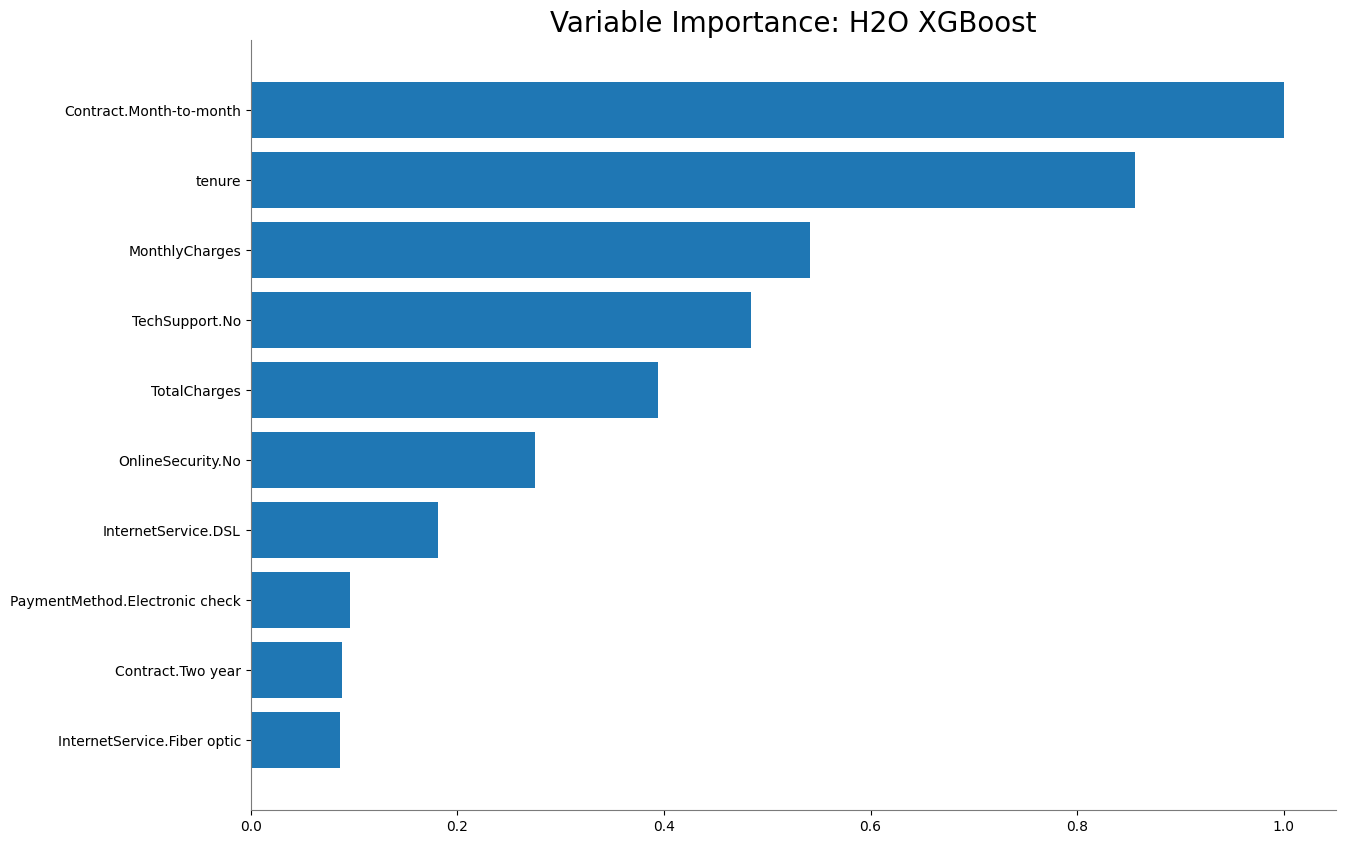

<Figure size 640x480 with 0 Axes>

In [ ]:
out.varimp_plot()

In [ ]:
aml.leader.download_mojo(path="./")

'/content/GBM_1_AutoML_1_20250707_81957.zip'